In [1]:
%load_ext autoreload
%autoreload 2
from wind.odecache import MultiODECache,ODECache
import matplotlib.pyplot as plt
%matplotlib inline
from abg_python.all_utils import *
from distinct_colours import get_distinct

/Users/agurvich/anaconda/envs/ytdev/lib/python3.6/site-packages/matplotlib/style/core.py:167: UserWarning: In /Users/agurvich/.matplotlib/stylelib/ABG_black_presentation.mplstyle: Duplicate key in file "/Users/agurvich/.matplotlib/stylelib/ABG_black_presentation.mplstyle", line #9
  styles = read_style_directory(stylelib_path)


In [2]:
savefig = 0
if savefig:
    plt.style.use('ABG_black_presentation')

In [36]:
nsystem_tiles=[5, 10, 20, 50, 100, 200, 500, 1000][:4] # (1) #

names = ['Katz96_neqntile.%d_nsystemtile.%d_fixed.%d_abs.%s_rel.%s'%(
    30,nsystem_tile,1,'5e3','5e3') 
         for nsystem_tile in nsystem_tiles]
quest_multi_odes = MultiODECache(names,'../../quest_data')
thinkpad_multi_odes = MultiODECache(names,'../../thinkpad_data')
bw_multi_odes = MultiODECache(names,'../../bw_data')

../../quest_data/Katz96_neqntile.30_nsystemtile.5_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.30_nsystemtile.10_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.30_nsystemtile.20_fixed.1_abs.5e3_rel.5e3


/Users/agurvich/anaconda/envs/ytdev/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


../../quest_data/Katz96_neqntile.30_nsystemtile.50_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.30_nsystemtile.5_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.30_nsystemtile.10_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.30_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.30_nsystemtile.50_fixed.1_abs.5e3_rel.5e3
../../bw_data/Katz96_neqntile.30_nsystemtile.5_fixed.1_abs.5e3_rel.5e3
../../bw_data/Katz96_neqntile.30_nsystemtile.10_fixed.1_abs.5e3_rel.5e3
../../bw_data/Katz96_neqntile.30_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../bw_data/Katz96_neqntile.30_nsystemtile.50_fixed.1_abs.5e3_rel.5e3


## Plot Memory Usage vs. Time

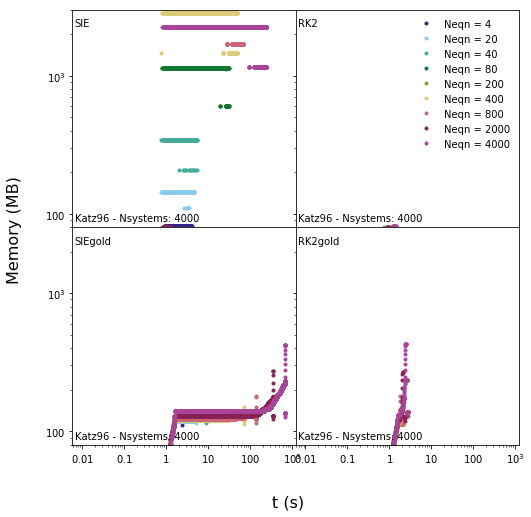

In [27]:
multi_odes.plot_memory_usages(
    label_fn=lambda x: "Neqn = %d"%x.Nsystems)

In [84]:
np.sum(multi_odes[-1].walltimess['SIEgold'])/np.sum(multi_odes[-1].walltimess['SIE'])

2.8290128367292744

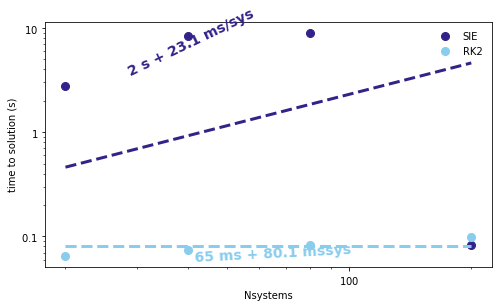

In [64]:
fig,ax = thinkpad_multi_odes.plot_tts_vs_xs(
    x_function=lambda x: x.Nsystems,
    xname='Nsystems',
    yname='time to solution (s)',
    eqn_legend=False,
    pos_rels = [0,.3,.9,.8],
    slopes=[1,0],
    var_label='sys',
    vas = ['top','top','bottom','top'])
fig.set_facecolor('white')
fig

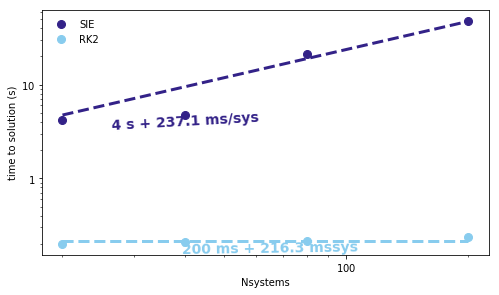

In [62]:
fig,ax = quest_multi_odes.plot_tts_vs_xs(
    x_function=lambda x: x.Nsystems,
    xname='Nsystems',
    yname='time to solution (s)',
    eqn_legend=False,
    pos_rels = [0,.3,.9,.8],
    slopes=[1,0],
    var_label='sys',
    vas = ['top','top','bottom','top'])
fig.set_facecolor('white')
fig

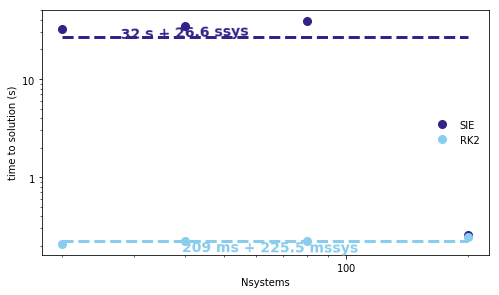

In [60]:
fig,ax = bw_multi_odes.plot_tts_vs_xs(
    x_function=lambda x: x.Nsystems,
    xname='Nsystems',
    yname='time to solution (s)',
    eqn_legend=False,
    pos_rels = [0,.3,.9,.8],
    slopes=[0,0],
    var_label='sys',
    vas = ['top','top','bottom','top'])
fig.set_facecolor('white')
fig

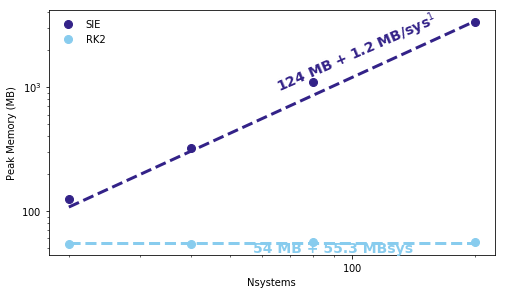

In [55]:
fig,ax = thinkpad_multi_odes.plot_tts_vs_xs(
    x_function=lambda x: x.Nsystems,
    y_function=lambda x,solver: np.max(x.memory_usages[solver]),
    xname='Nsystems',
    yname='Peak Memory (MB)',
    eqn_legend=False,
    pos_rels = [0.6,0.5,.0,0],
    units = 'MB',
    var_label='sys',
    slopes=[1.5,0],
    vas = ['bottom','top','bottom','top'])
fig.set_facecolor('white')
fig

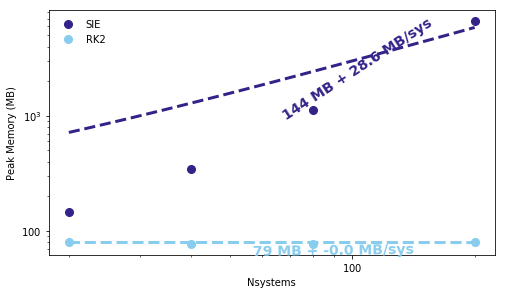

In [38]:
fig,ax = quest_multi_odes.plot_tts_vs_xs(
    x_function=lambda x: x.Nsystems,
    y_function=lambda x,solver: np.max(x.memory_usages[solver]),
    xname='Nsystems',
    yname='Peak Memory (MB)',
    eqn_legend=False,
    pos_rels = [0.6,0.5,.0,0],
    units = 'MB',
    var_label='sys',
    vas = ['bottom','top','bottom','top'])
fig.set_facecolor('white')
fig

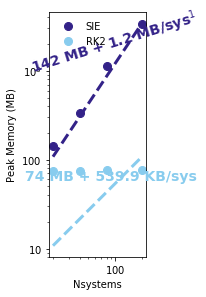

In [50]:
fig,ax = bw_multi_odes.plot_tts_vs_xs(
    x_function=lambda x: x.Nsystems,
    y_function=lambda x,solver: np.max(x.memory_usages[solver]),
    xname='Nsystems',
    yname='Peak Memory (MB)',
    eqn_legend=False,
    pos_rels = [0.6,0.5,.0,0],
    units = 'MB',
    var_label='sys',
    slopes=[1.5,1],
    vas = ['bottom','top','bottom','top'])
fig.set_facecolor('white')
ax.set_aspect(1)
fig

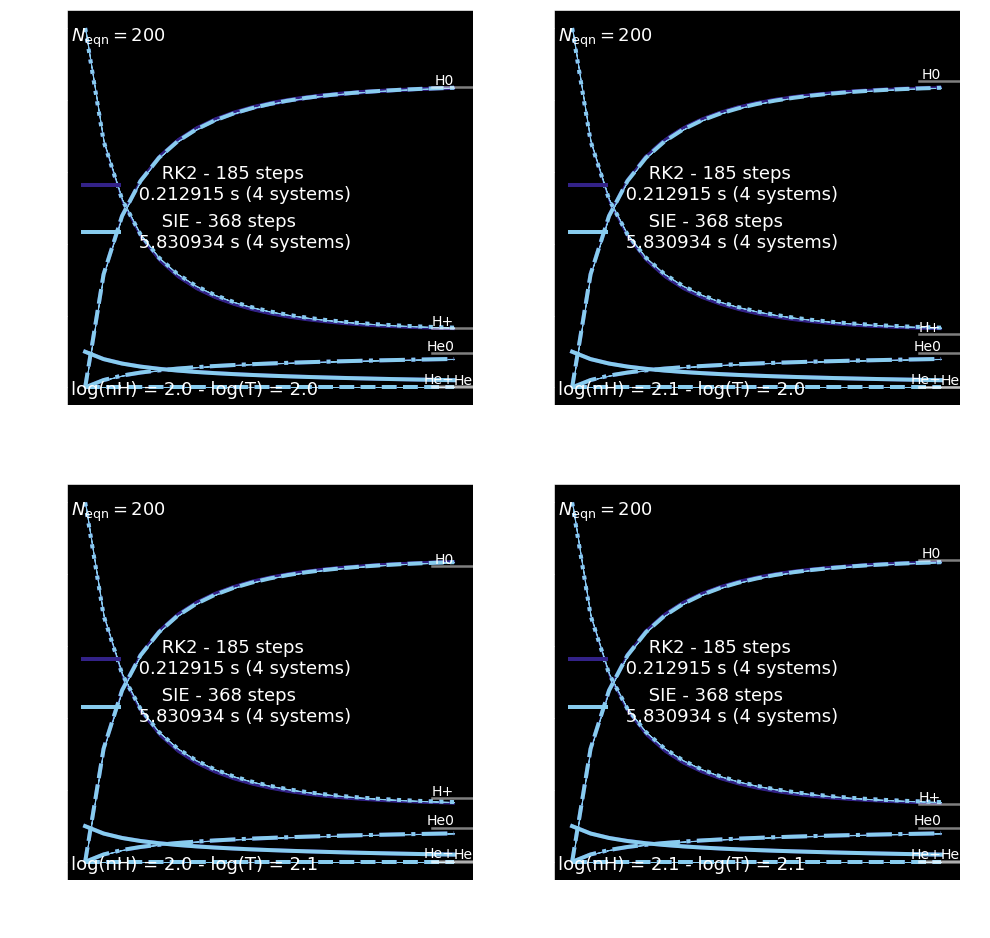

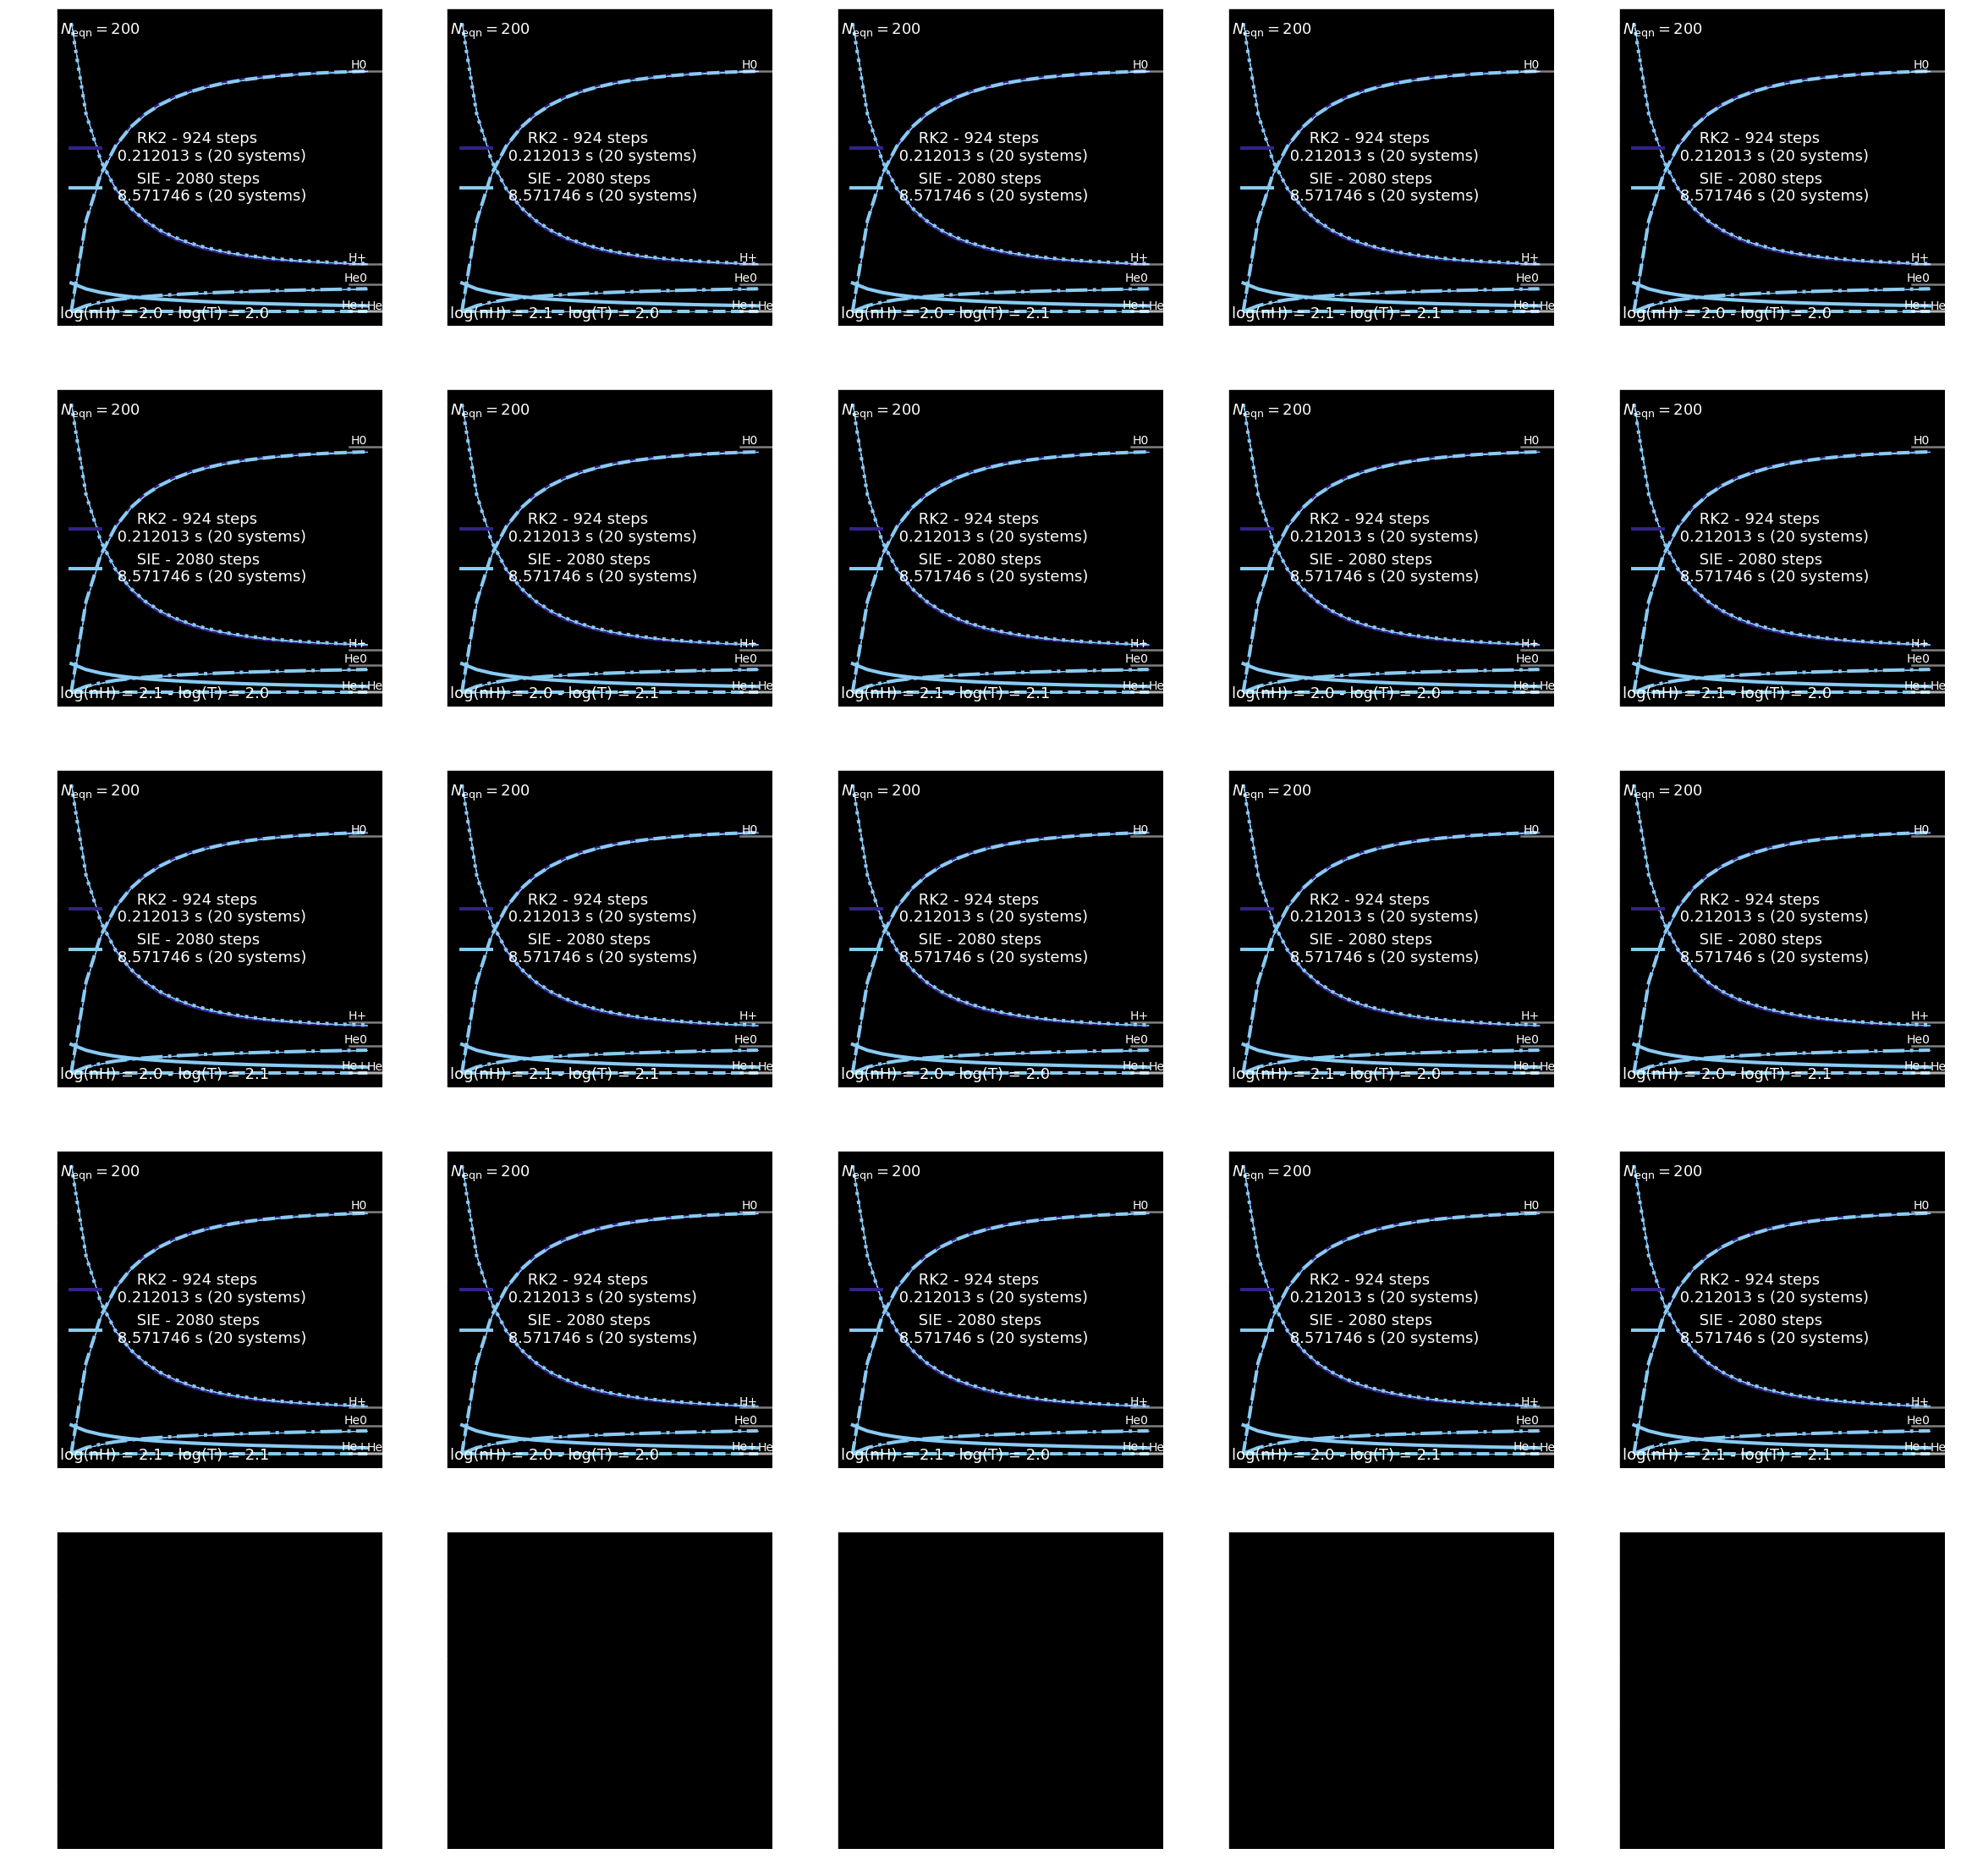

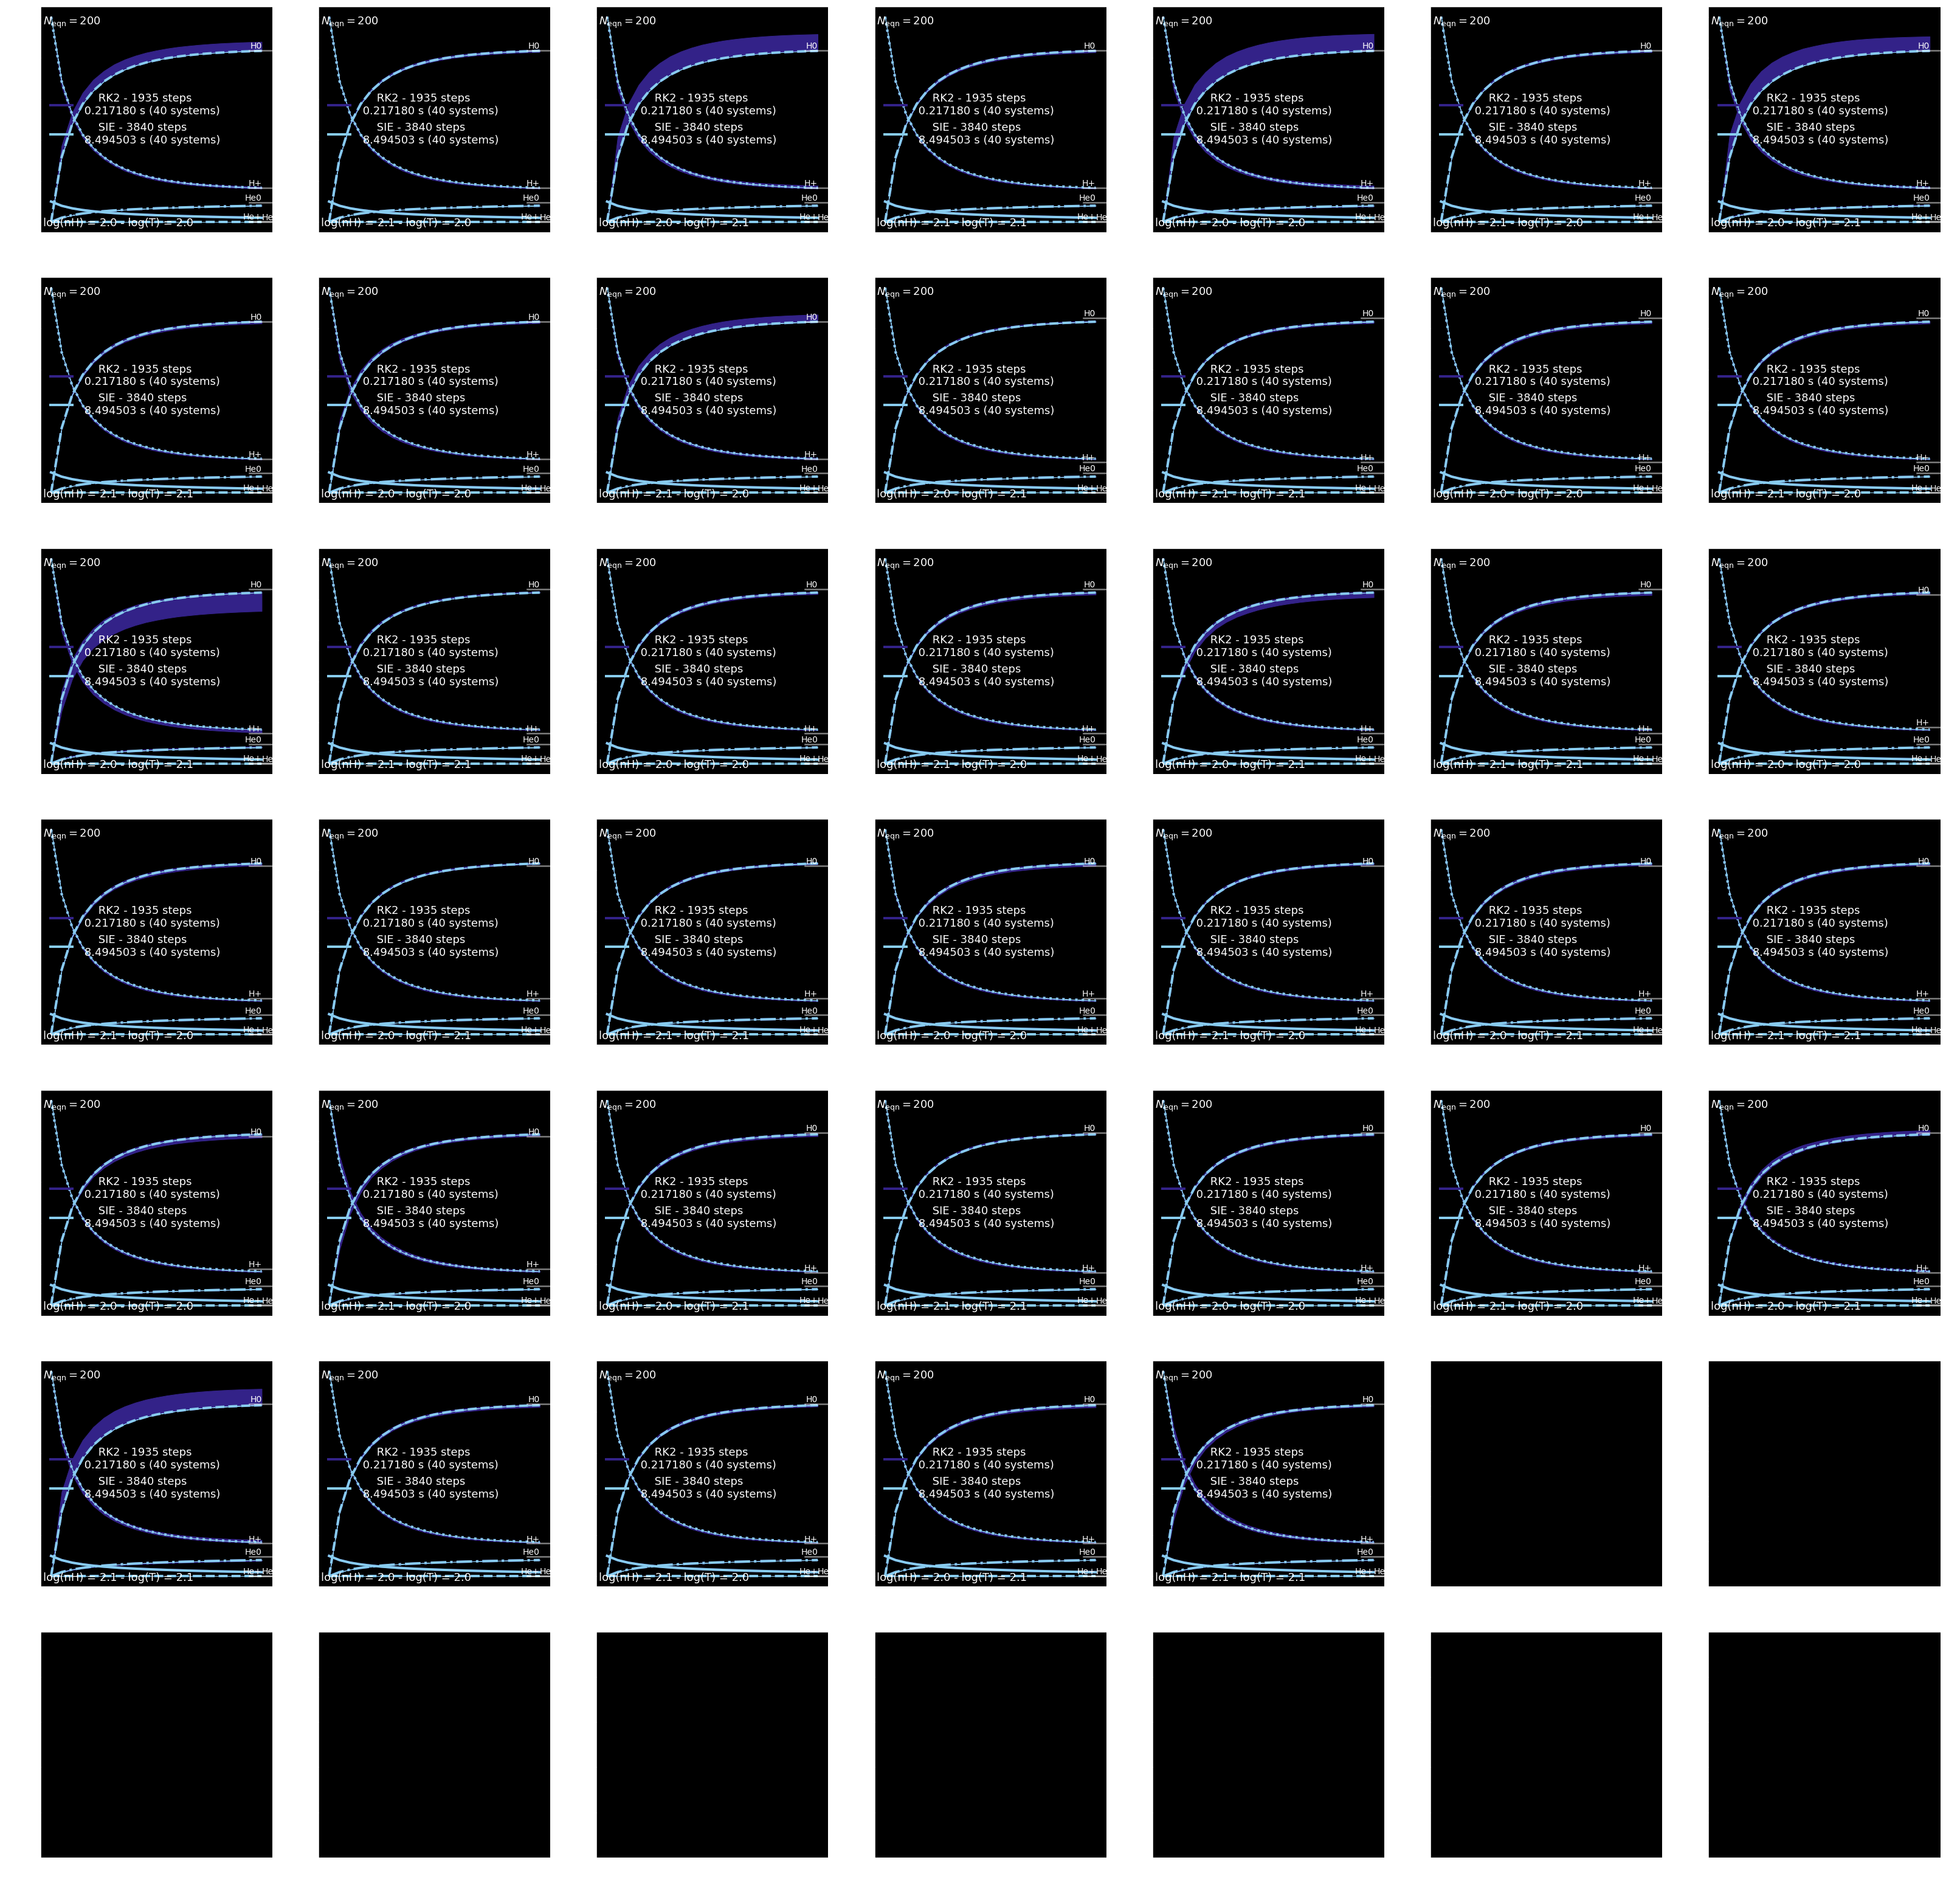

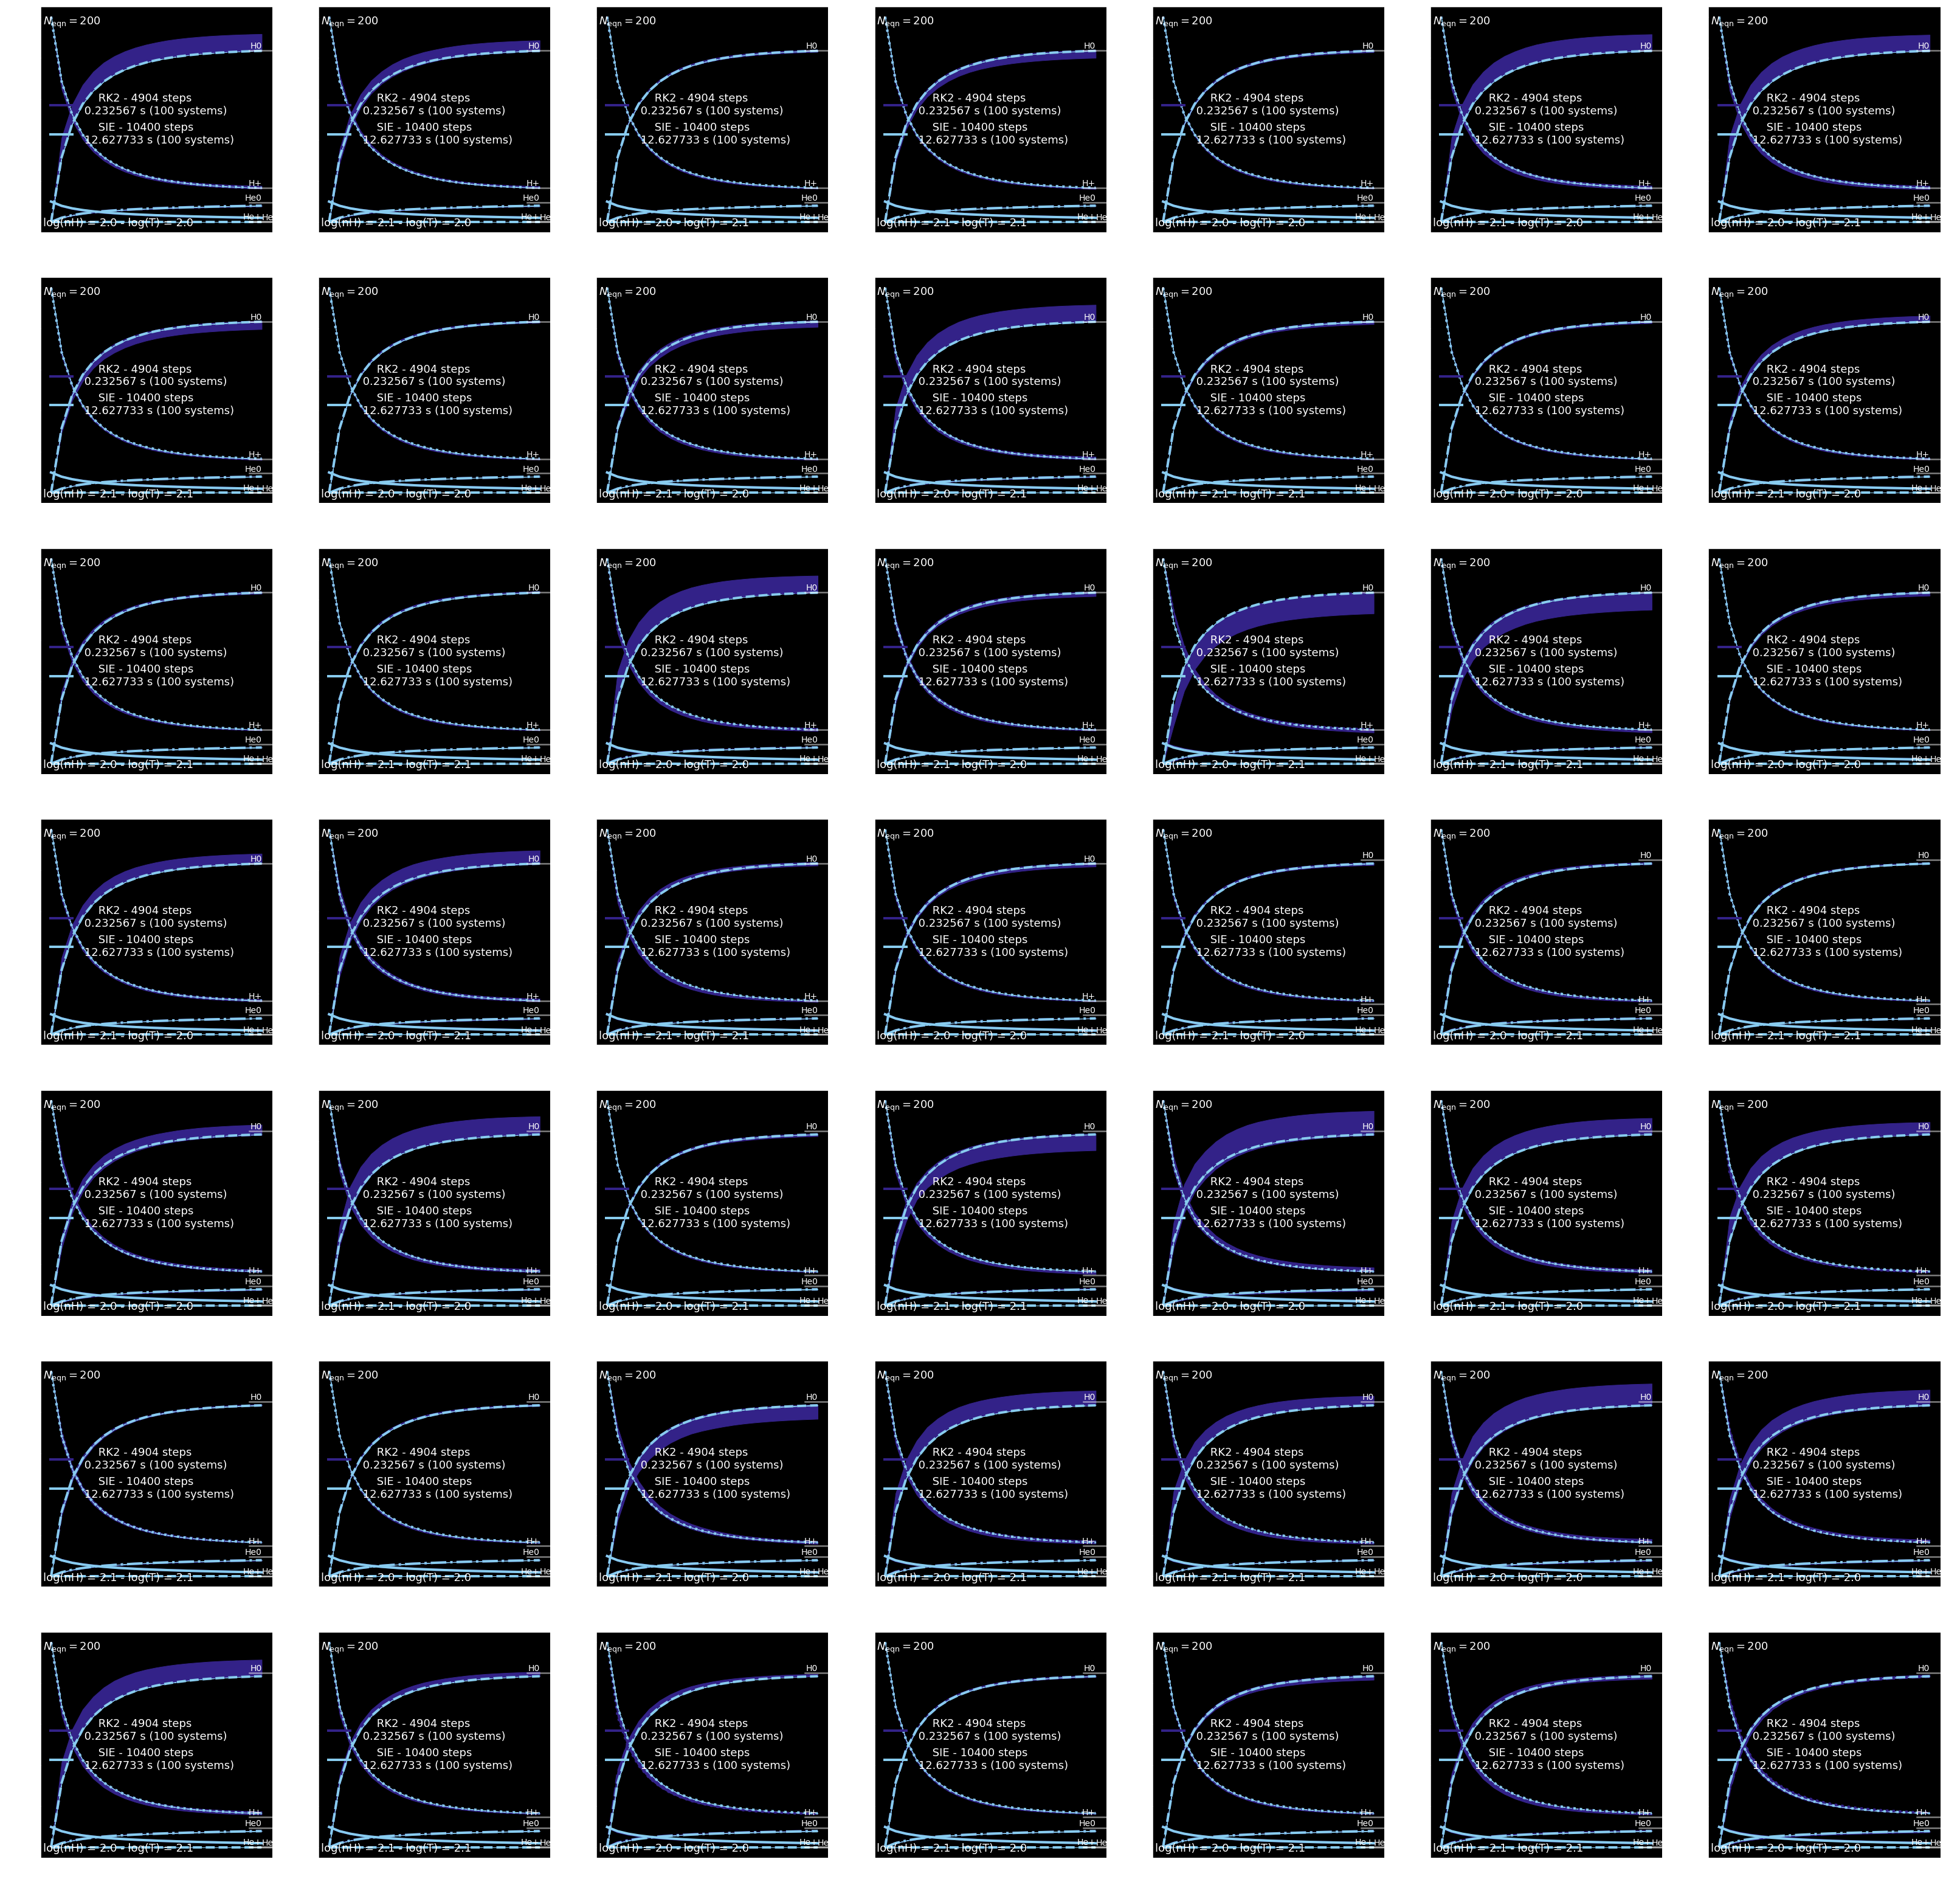

In [212]:
for frame_num,ode_cache in enumerate(multi_odes.ode_caches[:4]):
    fig,axs = ode_cache.plot_all_systems(
    xname = r'$t_\mathrm{ode}$ (yrs)',
    yname = r'$n_\mathrm{X}/n_\mathrm{H}$',
    supertitle = r"$N_\mathrm{eqn}=%d$"%ode_cache.Nequations_per_system,
    plot_eqm=True,
    loc=6)
    axs = np.array(axs)
    for ax in axs[1::2]:
        ax.set_yticklabels([])
    if savefig:
        fig.savefig(
            "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
            facecolor='k')
if savefig:
    frame_num+=1
    fig.savefig(
        "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
        facecolor='k')
    frame_num+=1
    fig.savefig(
        "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
        facecolor='k')

print()

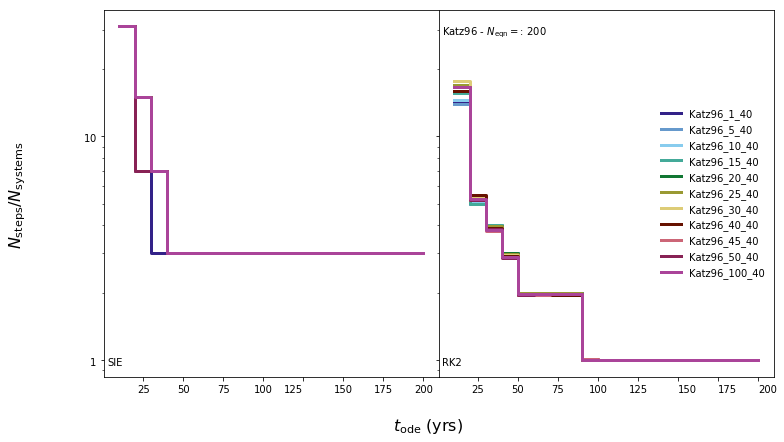

In [28]:
def plot_all_nsteps_histogram(multi_odes):
    fig,axs = plt.subplots(ncols=2,nrows=1,sharex=True,sharey=True)
    axs = axs.flatten()
    for ax,solver in zip(axs,['SIE','RK2']):
        for ode_cache in multi_odes:
            plot_nsteps_histogram(ax,ode_cache,solver)
    return fig,axs

def plot_nsteps_histogram(ax,ode_cache,solver):
    ## get enough colors for each ode system
    xs = ode_cache.timess[solver]
    ys = ode_cache.nstepss[solver]/ode_cache.Nsystems
    if solver == 'SIE':
        ys*=ode_cache.Nsystems
    ax.step(
        xs[1:],ys,
        lw=3,
        label=ode_cache.name,
        where='post',
        color=ode_cache.color)
    
    nameAxes(
        ax,None,
        '$t_\mathrm{ode}$ (yrs)',
        '$N_\mathrm{steps}$',
        logflag=(0,1))
    return ax

fig,axs = plot_all_nsteps_histogram(multi_odes)

nameAxes(axs[0],None,None,None,
        subtitle='SIE')

nameAxes(axs[1],None,None,None,
    subtitle='RK2',
    supertitle="%s - $N_\mathrm{eqn}=$: %d"%(
        multi_odes.system_name,
        multi_odes[0].Nequations_per_system),
    make_legend=True,
    loc=)

bufferAxesLabels(axs,1,2,
    ylabels=True,share_xlabel='$t_\mathrm{ode}$ (yrs)',
    xlabels=True,share_ylabel= '$N_\mathrm{steps}$/$N_\mathrm{systems}$',
    label_offset=0.025)
plt.subplots_adjust(hspace=0,wspace=0)
fig.set_size_inches(12,6.75)
if savefig:
    fig.savefig("%s_nsteps_per_noutputsteps.pdf"%multi_odes.system_name,facecolor='k')